**Topic**: Challenge Set 6  
**Subject**: Learning Curve  
**Date**: 02/03/2018  
**Name**: Christine Liu

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/Users/cliuless/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Challenge 1
Generate (fake) data that is linearly related to log(x).
You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)
Simulate some data from this model.
Then fit two models to it:
quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

In [2]:
# generate points and keep a subset of them
n_samples = 100
B0 = 1.5
B1 = 5
eps = np.random.random_sample(n_samples)  - .5
X = np.random.random_sample(n_samples)
# X2 = np.random.uniform(0, 5, size=n_samples)[:, np.newaxis]

#random function
y = (B0 + B1*np.log(X) + eps)

In [3]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [4]:
# fit quadratic (second degree polynomial) 
# Set the degree of our polynomial
degree = 2
# use make_pipeline to feed polynomialfunction into linear regression
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X,y)
model.score(X,y)

0.83674977951653362

In [5]:
#fit to log by making X a log
# ASK - does that make sense?

lr_log = LinearRegression()
lr_log.fit(np.log(X),y)
lr_log.score(np.log(X),y)

0.997893770029886

#### Challenge 2
Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)
Split the data into a training and test set. Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.(You could use sklearn.metrics.mean_squared_error.)

In [54]:
# generate points and keep a subset of them
n_samples = 100
B0 = np.random.uniform(0.1,10)
B1 = np.random.uniform(0.1,10)
B2 = np.random.uniform(0.1,10)
eps = np.random.normal(scale=.8, size=n_samples)[:, np.newaxis] - .2

In [55]:
X2 = np.linspace(0, 10, 100)[:, np.newaxis]
y2 = B0 + B1*X2 + B2*X2**2 + eps

In [56]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

In [57]:
# fit quadratic (second degree polynomial) 
# Set the degree of our polynomial
degree = 2
# use make_pipeline to feed polynomialfunction into linear regression
# Fit a model to your training set.
model2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model2.fit(X2_train,y2_train)
model2.score(X2_test,y2_test)


0.99993224645634138

In [58]:
model2.predict(X2_train);

In [59]:
# Calculate mean squared error on your training set. 
mean_squared_error(y2_train, model2.predict(X2_train))

0.49227875731514237

In [60]:
#  Then calculate it on your test set.(You could use sklearn.metrics.mean_squared_error.)
mean_squared_error(y2_test, model2.predict(X2_test))

0.61717883182068356

#### Challenge 3
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:  
*  training error
*  test error
*  R squared
*  AIC

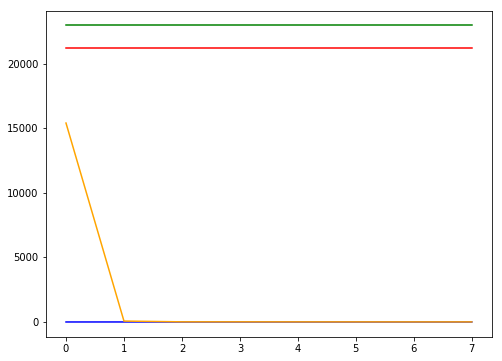

In [61]:
training_error = []
test_error = []
r2 = []
AIC = []

for i in range(8):
    model3 = make_pipeline(PolynomialFeatures(i), LinearRegression())
    model3.fit(X2_train,y2_train)
    training_error.append(mean_squared_error(X2_train, y2_train))
    test_error.append(mean_squared_error(X2_test,y2_test))
    r2.append(model3.score(X2_test,y2_test))
    AIC.append(sum(y2_test - model3.predict(X2_test))**2)
#plots
plt.figure(figsize = (8,6))
plt.plot(range(8), training_error, 'g', label = 'training MSE')
plt.plot(range(8), test_error, 'r', label = 'test MSE')
plt.plot(range(8), r2, 'b', label = 'r2')
plt.plot(range(8), AIC, 'orange', label = 'AIC')



#### Challenge 4
For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve

In [106]:
error_train = []
error_test = []

# Set the degree of our polynomial
degree = 2
# use make_pipeline to feed polynomialfunction into linear regression
# Fit a model to your training set.

for i in range(4,len(X2_train),5):
    model3 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model3.fit(X2_train[0:i],y2_train[0:i])
    model3.score(X2_test,y2_test)

#  Then calculate it on your test set.(You could use sklearn.metrics.mean_squared_error.)
    error_train.append(mean_squared_error(y2_train[0:i], model3.predict(X2_train[0:i])))
    error_test.append(mean_squared_error(y2_test, model3.predict(X2_test)))



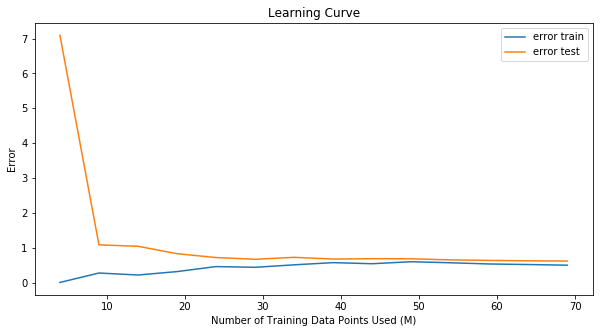

In [125]:
fig1, ax1 = plt.subplots(figsize = (10,5))
ax1.set_title('Learning Curve')
ax1.set_xlabel('Number of Training Data Points Used (M)')
ax1.set_ylabel('Error')
ax1.plot(range(4,len(X2_train), 5), error_train, label = 'error train')
ax1.plot(range(4,len(X2_train), 5), error_test, label = 'error test')
ax1.legend()